# Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('../data/survey_clean_rick.csv')
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,1,0,0,1,0,0,0,1,0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,1,0,0,1,0,0,0,1,0


In [3]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'NObeyesdad',
       'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

### KMeans

In [4]:
X = df[['Height', 'Weight']]

In [51]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [52]:
df['cluster'] = km.labels_
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,cluster,color
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,0,0,1,0,0,1,0,2,blue
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,0,1,0,0,0,1,0,2,orange
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,0,0,0,1,0,0,red
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0,1,0,0,0,0,0,1,0,red
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,0,1,0,0,0,1,0,0,red


In [53]:
df.cluster.value_counts(normalize = True)

0    0.291331
1    0.253434
2    0.235433
3    0.219801
Name: cluster, dtype: float64

In [54]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[  1.75005909,  71.78133487],
       [  1.79492378, 118.57858793],
       [  1.58749787,  60.13544097],
       [  1.65212491,  97.70844   ]])

In [55]:
centroids = pd.DataFrame(centroids, columns = ['Height', 'Weight'])

centroids

,Height,Weight
0,1.750059,71.781335
1,1.794924,118.578588
2,1.587498,60.135441
3,1.652125,97.708440


<Figure size 720x576 with 0 Axes>

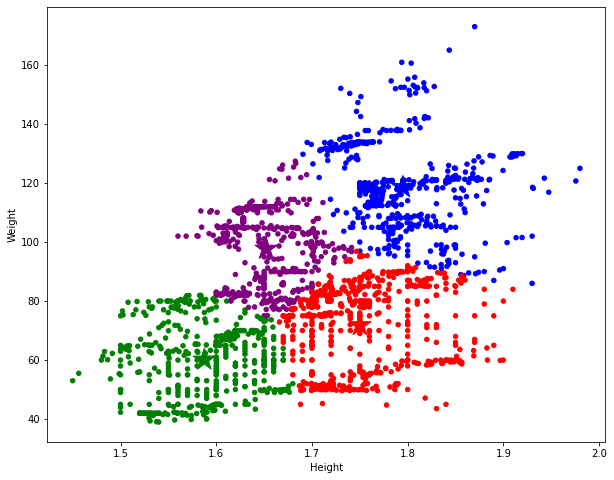

In [56]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'Height', y = 'Weight',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'Height', y = 'Weight', 
    marker='*', c=colors, s=550, ax=ax);

In [57]:
silhouette_score(X_scaled, km.labels_)

0.4038789184334353

C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0.5, 1.0, 'Inertia Scores')

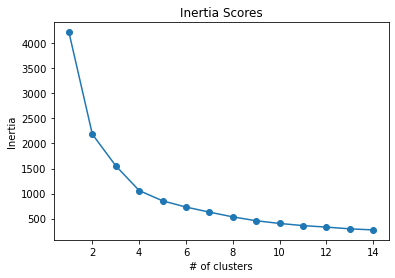

In [58]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

In [59]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'NObeyesdad',
       'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'cluster', 'color'],
      dtype='object')

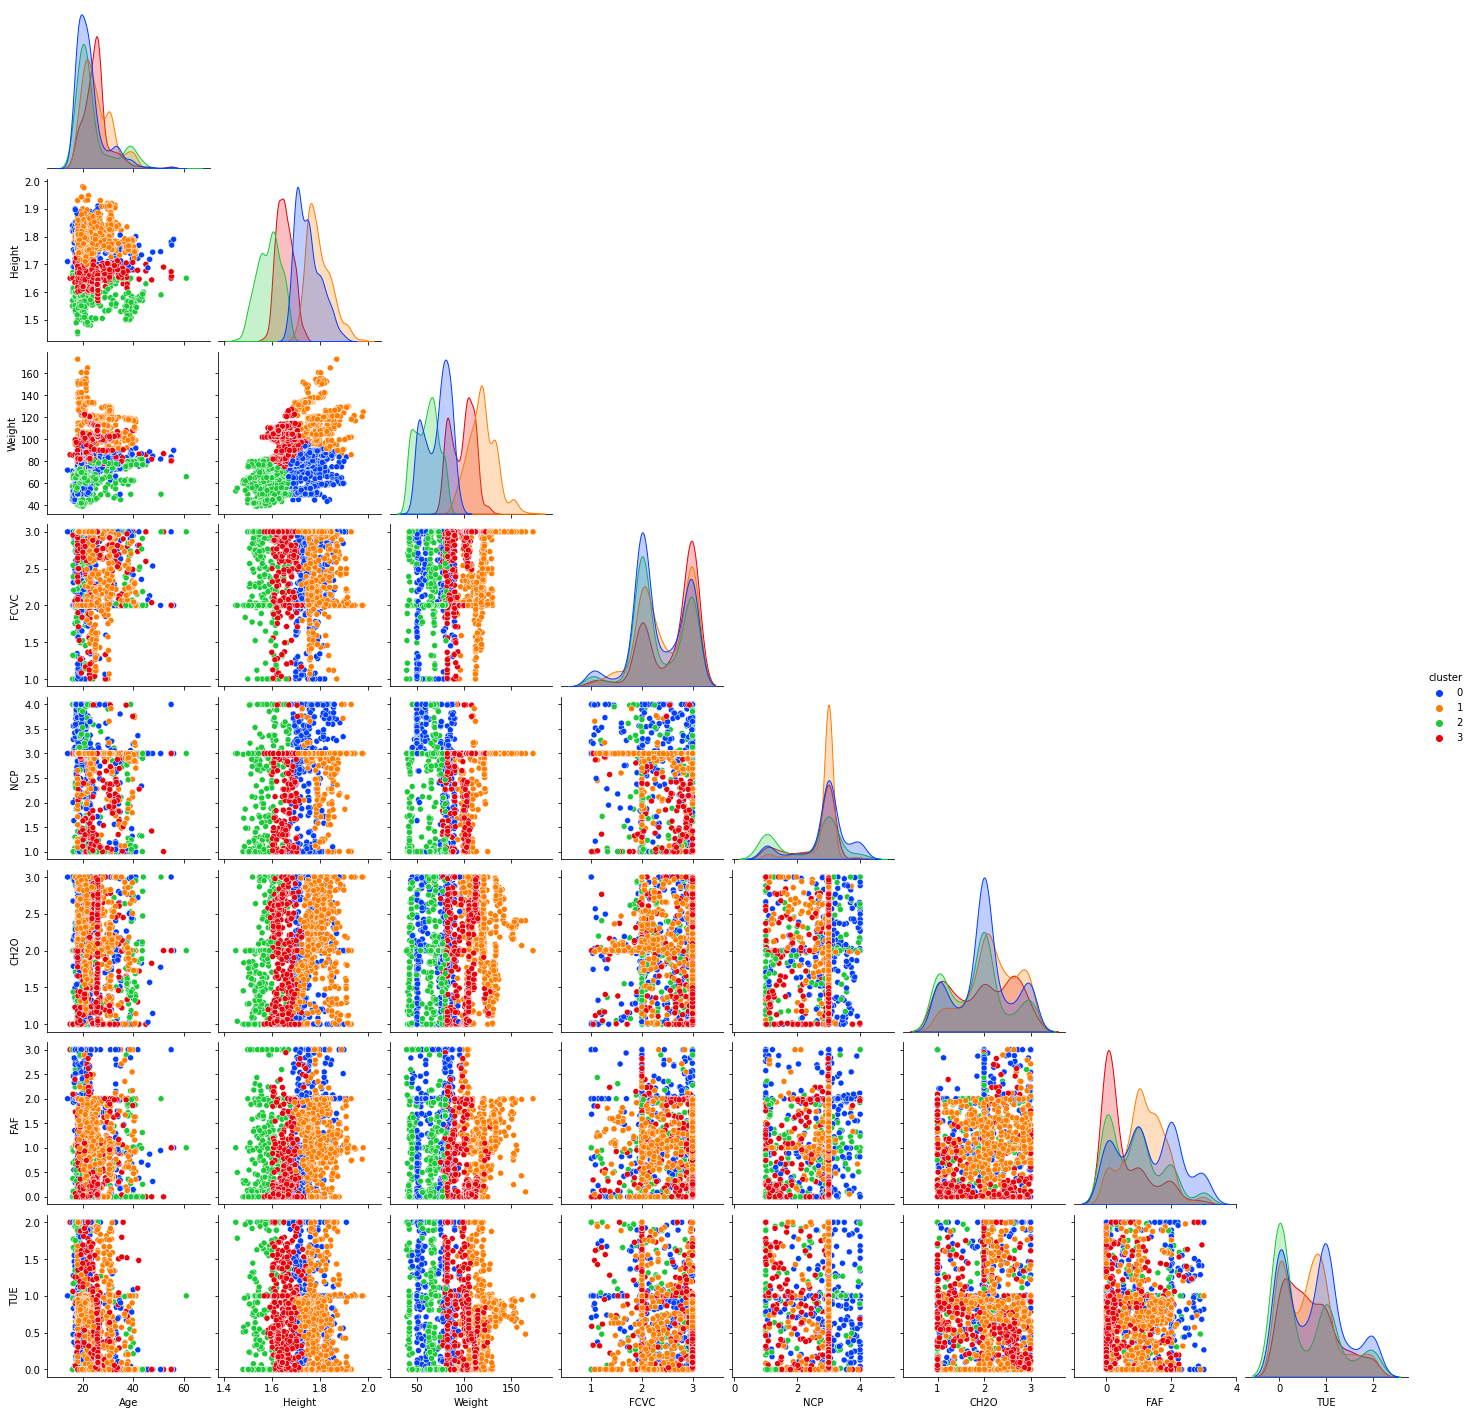

In [60]:
sns.pairplot(df.drop(columns = ['family_history_with_overweight', 'FAVC','SMOKE', 'SCC', 'NObeyesdad',
                                'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
                                'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                                'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',]), 
             hue = 'cluster', palette = 'bright', corner = True)

In [19]:
silhouette_list = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
silhouette_list

[0.40539212027091087,
 0.36668452434441656,
 0.4038789184334353,
 0.3900426143538227,
 0.3972122865849636,
 0.4083802628416078,
 0.4081958005845303,
 0.42441895138622804,
 0.4284271490500064]

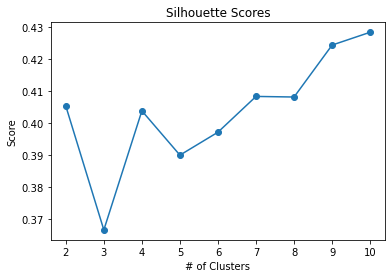

In [20]:
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

In [ ]:
#asdf

#### DBSCAN
Not the best because there is no clear separation of clusters within the dataset

In [61]:
dbscan = DBSCAN(eps = 0.175)
dbscan.fit(X_scaled)

DBSCAN(eps=0.175)

In [62]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1,  1,  2,  3,  4], dtype=int64)

In [63]:
silhouette_score(X_scaled, dbscan.labels_)

-0.04157223849790374

In [64]:
df['cluster'] = dbscan.labels_

df.cluster.value_counts(normalize = True)

 0    0.901942
 3    0.054477
-1    0.026528
 4    0.008053
 2    0.006158
 1    0.002842
Name: cluster, dtype: float64

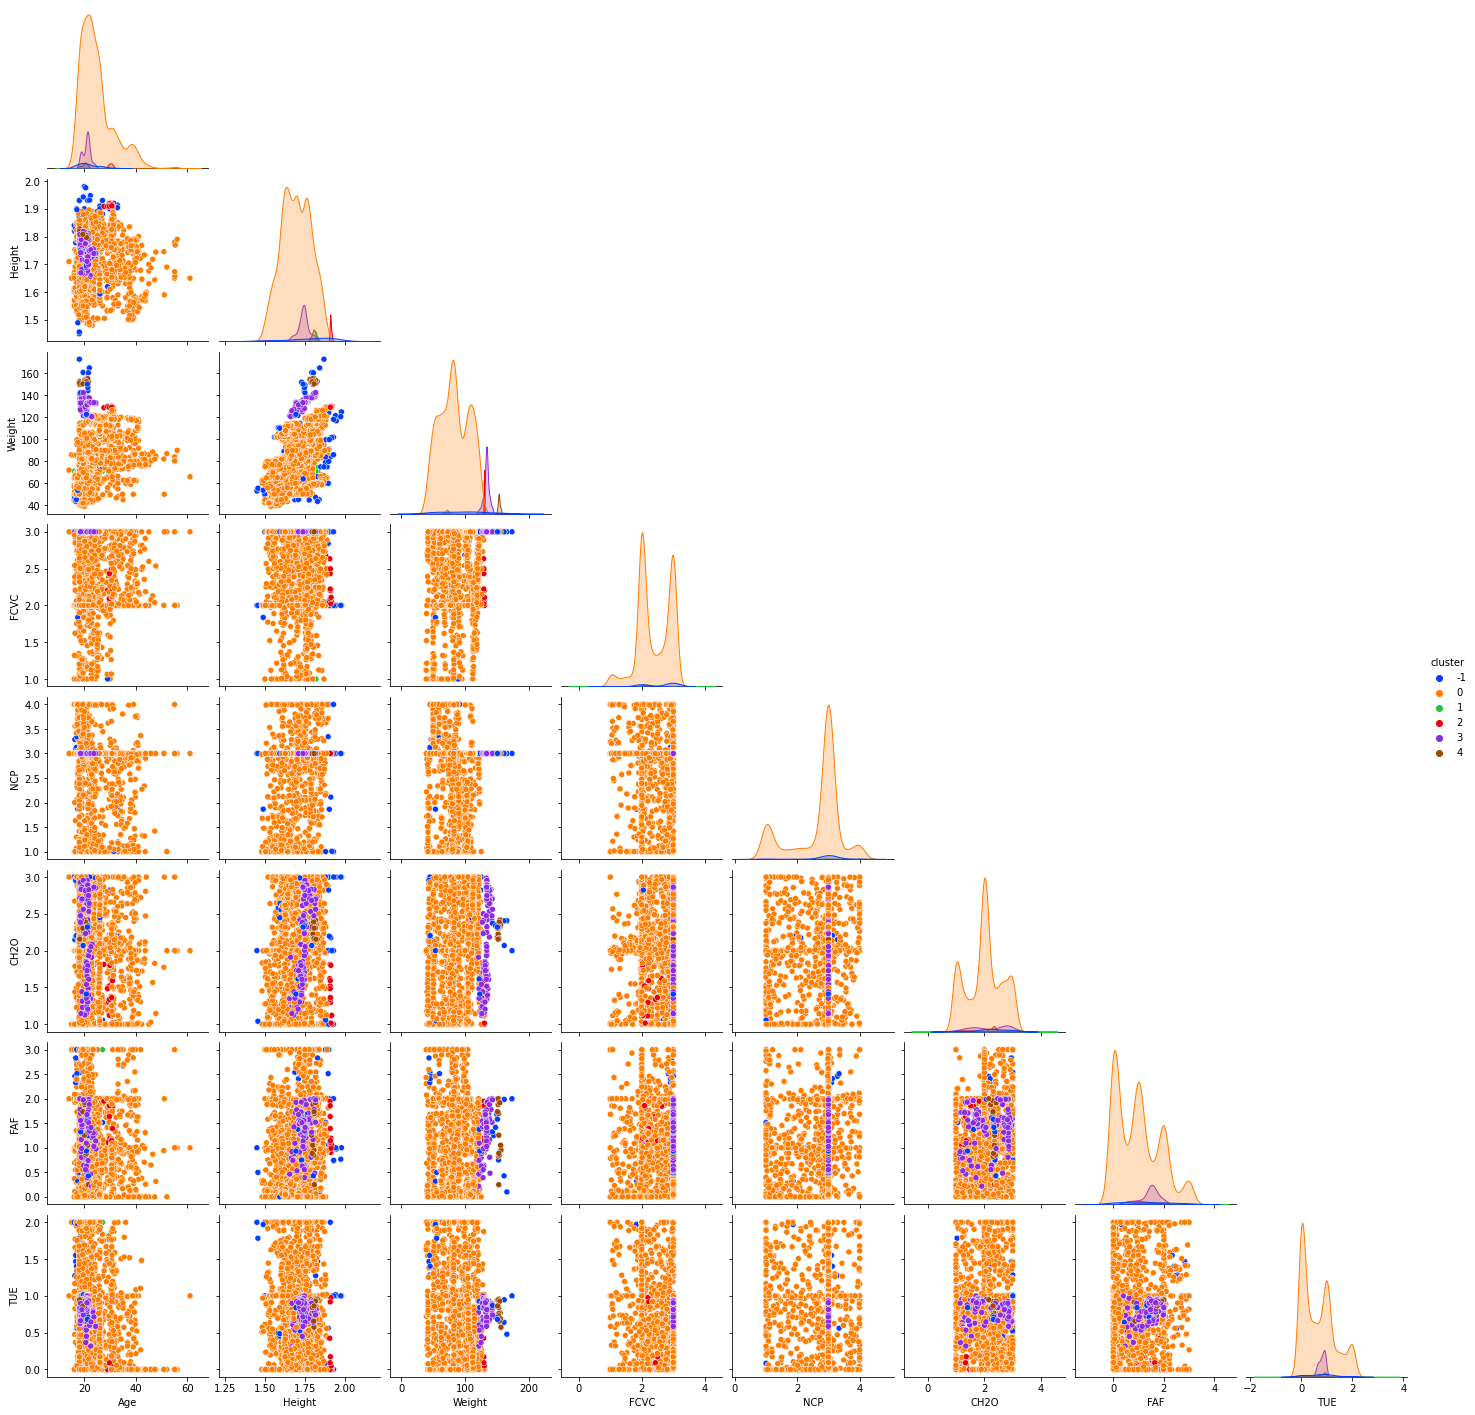

In [65]:
sns.pairplot(df.drop(columns = ['family_history_with_overweight', 'FAVC','SMOKE', 'SCC', 'NObeyesdad',
                                'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
                                'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                                'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',]),
             hue = 'cluster', palette = 'bright', corner = True);